## HACKER NEWS POST ANALYSIS
(https://news.ycombinator.com/news)

### Goal: 
Determine charateristics that correlate with popular posts.

### Data:
Data can be downloaded from here:
https://www.kaggle.com/hacker-news/hacker-news-posts/code?datasetId=197&sortBy=voteCount

Approximately 300,000 posts from 2015 and 2016

Column Headers: 

    title: title of the post
    url: the url of the item being linked to
    num_points: the number of upvotes the post received
    num_comments: the number of comments the post received
    author: the name of the account that made the post
    created_at: the date and time the post was made (the time zone is Eastern Time in the US, i.e. New York)


### Approach:
We will investigate whether particular metrics correlate with the popularity of posts, which will be evaluated by the number of comments and upvotes ('points') it received.

First we will assess the structure of the data, including data types, data shape, and missing/null values. We will then proceed to evaluate the data to determine if we observe particular characteristics that postively correlate with the popularity of posts.

We will assess the following metrics:

-Time when post was created.

-Author of post.

-Word patterns contained in the title.

-Subject matter of post.






### 🠋 Reading in data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

hn = pd.read_csv("hn_posts.csv")


### 🠋 Structure of HN dataset

In [2]:
print(hn[0:0])
hn

Empty DataFrame
Columns: [id, title, url, num_points, num_comments, author, created_at]
Index: []


,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14
...,...,...,...,...,...,...,...
293114,10176919,Ask HN: What is/are your favorite quote(s)?,NaN,15,20,kumarski,9/6/2015 6:02
293115,10176917,Attention and awareness in stage magic: turnin...,http://people.cs.uchicago.edu/~luitien/nrn2473...,14,0,stakent,9/6/2015 6:01
293116,10176908,Dying vets fuck you letter (2013),http://dangerousminds.net/comments/dying_vets_...,10,2,mycodebreaks,9/6/2015 5:56
293117,10176907,"PHP 7 Coolest Features: Space Ships, Type Hint...",https://www.zend.com/en/resources/php-7,2,0,Garbage,9/6/2015 5:55


### 🠋 Data types

In [3]:
hn.dtypes

id               int64
title           object
url             object
num_points       int64
num_comments     int64
author          object
created_at      object
dtype: object

### 🠋 Data shape

In [4]:
hn.shape

(293119, 7)

### 🠋 Description of data.

In [5]:
hn.describe(include='all', datetime_is_numeric = True)

,id,title,url,num_points,num_comments,author,created_at
count,2.931190e+05,293119,279256,293119.000000,293119.000000,293119,293119
unique,NaN,269452,247602,NaN,NaN,51900,215563
top,NaN,Employee benefits at Basecamp,http://www.aioptify.com/topmldmbooks.php?utm_s...,NaN,NaN,jonbaer,4/9/2016 22:40
freq,NaN,15,22,NaN,NaN,2731,11
mean,1.133046e+07,NaN,NaN,15.025324,6.525544,NaN,NaN
std,6.961055e+05,NaN,NaN,58.504103,30.376319,NaN,NaN
min,1.017690e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,1.071636e+07,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,1.130303e+07,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,1.193152e+07,NaN,NaN,4.000000,1.000000,NaN,NaN


# Reduce memory burden by lowering int, using categoricals where able, only passing the columns used for analysis. Test memory usage before and after.

In [6]:
hn.memory_usage(deep=True)

Index                128
id               2344952
title           31081809
url             37331245
num_points       2344952
num_comments     2344952
author          19107011
created_at      21008520
dtype: int64

In [7]:
hn.memory_usage(deep=True).sum()

115563569

In [8]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [9]:
hn.dtypes

id               int64
title           object
url             object
num_points       int64
num_comments     int64
author          object
created_at      object
dtype: object

In [10]:
# hn['num_points'] = hn['num_points'].astype('int16')
# hn.dtypes

hn = hn.astype({
    'num_points': 'int16',
    'num_comments': 'int16',
    'id': 'float32'
})

hn.dtypes
hn.memory_usage(deep=True).sum() # originally was 115563569

110873665

In [11]:
hn.author.value_counts(dropna=False)

jonbaer          2731
ingve            2487
prostoalex       1656
dnetesn          1517
jseliger         1382
                 ... 
collision           1
heyyouyou           1
petertrapasso       1
house9-2            1
singular_tony       1
Name: author, Length: 51900, dtype: int64

In [12]:
hn = hn.astype({
    'author': 'category'   
})

hn.dtypes
hn.memory_usage(deep=True).sum() # originally was 115563569

98450477

In [13]:
# dropping columns that won't be used for analysis to recuce memory footprint

hn = hn.drop(['url'], axis=1)
hn.memory_usage(deep=True).sum() # originally was 115563569--> reduced memory footprint by ~48%

61119232

In [14]:
# no null val;ues in current hn dataframe (only previous nulls were in 'url' column)

hn.isnull().value_counts()

id     title  num_points  num_comments  author  created_at
False  False  False       False         False   False         293119
dtype: int64

### 🠋 Number of null values by column.

### 🠉 Only 'url' row has null values (~5%).
We will keep these rows in the analysis, as the 'url' column won't play an essenytial part in the analysis.

In [15]:
# # where are they missing?
# hn.url.isna().sum()
# pd.__version__

### 🠋 Average number of comments per HN post

In [16]:
total_comments = hn['num_comments'].sum()

avg_comments = total_comments / len(hn['num_comments'])
print("This is the average number of comments for HN posts:", round(avg_comments, 2))


This is the average number of comments for HN posts: 6.53


## Now we will explore whether the hour at which posts are submitted influences popularity.

### 🠋 Converting 'created_at' column to datetime format, separating our by hour, month, year, and title in lowercase.


In [17]:
hn['time_posted'] = hn['created_at'].map(lambda x:datetime.strptime(x,'%m/%d/%Y %H:%M'))
hn['hour'] = hn['time_posted'].map(lambda x:x.hour)
# hn['weekday'] = hn['created_at'].map(lambda x:x.weekday_name)
hn['month'] = hn['time_posted'].map(lambda x:x.month)
hn['year'] = hn['time_posted'].map(lambda x:x.year)
hn['title'] = hn['title'].map(lambda x:x.lower())


### 🠋 Total comments by hour is greatest from 1pm to 7pm. 
### <span style='color:gray'> Distribution of the total number of comments by hour of the day. </span>
Posts submitted bvetween 1pm and 7pm (Eastern US Time Zone) recieve the greatest number of comments.

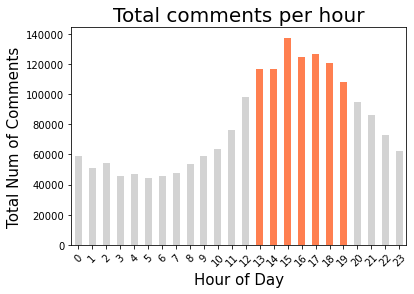

In [18]:
# Total comments per hour
total_com_by_hour = hn.groupby('hour').sum()

total_com_by_hour['num_comments'].plot.bar(color=[
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','coral','coral','coral','coral','coral',
                                                  'coral','coral','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey'
                                                  ])

plt.title('Total comments per hour', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Total Num of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Most comments occur from 1pm to 7pm regardless of month.
### <span style='color:gray '> Distribution of total comments by hour, plotted for each month of the year.. </span>
There tends to be a greater number of posts from 1pm to 7pm (Eastern US Time Zone), which validates the inference of the analyses above.

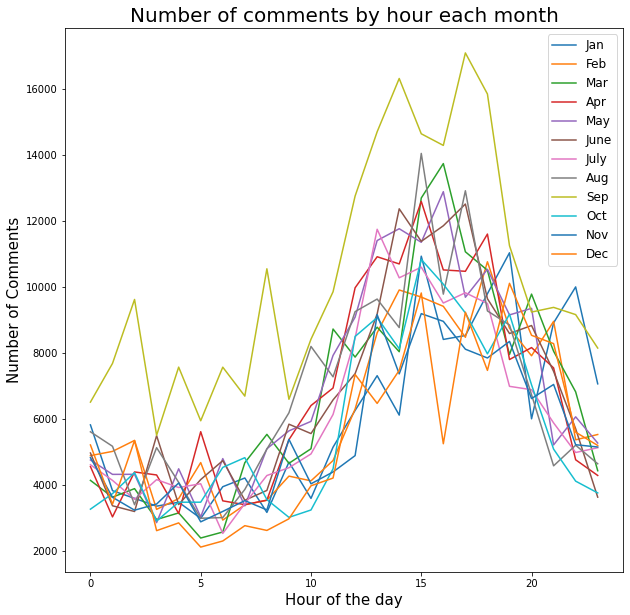

In [19]:
#Total number of comments by hour of the day, plotted for each month of the year.

plt.figure()
monthLabel = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    hn[hn['month'] == monthVal].groupby(['hour'])['num_comments'].sum().plot(figsize=(10,10), label=monthLabel[monthVal-1])

plt.title('Number of comments by hour each month', fontsize=20)   
plt.xlabel("Hour of the day", fontsize=15)
plt.ylabel("Number of Comments", fontsize=15)
plt.legend(fontsize=12)
plt.show()

## 🠋 Total upvotes is greatest from 1pm to 7pm.
### <span style='color:gray '> Total number of upvotes by hour of the day. </span>
Posts submitted between 1pm and 7pm (Eastern US Time Zone) recieve the greatest number of upvotes ('points').

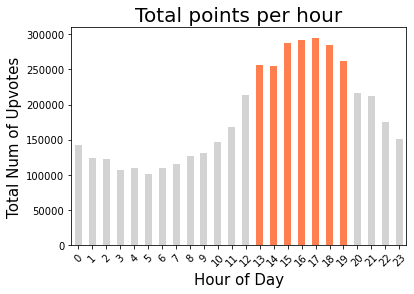

In [20]:
# Total upvotes per hour
total_points_by_hour = hn.groupby('hour').sum()
total_points_by_hour['num_points'].plot.bar(color=[
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','coral','coral','coral','coral','coral',
                                                  'coral','coral','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey'
                                                  ])

plt.title('Total points per hour', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Total Num of Upvotes', fontsize=15)
plt.xticks(rotation=45)
plt.show()

## 🠋 Most upvotes occur from 1pm to 7pm regardless of month.
### <span style='color:gray '> Distribution of upvotes by hour, plotted for each month of the year. </span>
There tends to be a greater number of posts from 1pm to 7pm (Eastern US Time Zone), which validates the inference of the analyses above.

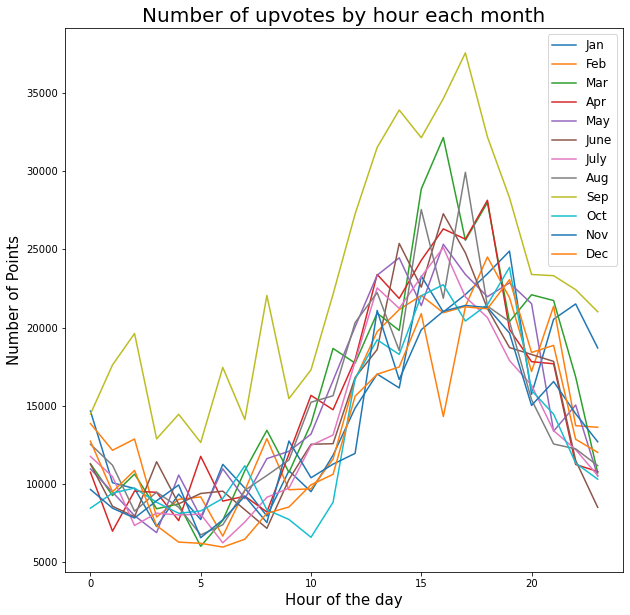

In [21]:
#Total number of upvotes by hour of the day, plotted for each month of the year.

plt.figure()
for monthVal in range(1,13):
    hn[hn['month'] == monthVal].groupby(['hour'])['num_points'].sum().plot(figsize = (10,10), label = monthLabel[monthVal-1])

plt.title('Number of upvotes by hour each month', fontsize=20)    
plt.xlabel("Hour of the day", fontsize=15)
plt.ylabel("Number of Points", fontsize=15)
plt.legend(fontsize=12)
plt.show()

## 🠋 However, most posts also occur from 1pm to 7pm.
This suggests that the the average number of comments and upvotes may not vary much by hour of the day. Consequently, that would mean there is no strikingly advantageous time to post in an effort to maximize popularity.
### <span style='color:gray '> Distribution of total posts by hour, plotted by month of the year. </span>
There tends to be a greater number of posts from 1pm to 7pm (Eastern US Time Zone), which validates the inference of the analyses above.

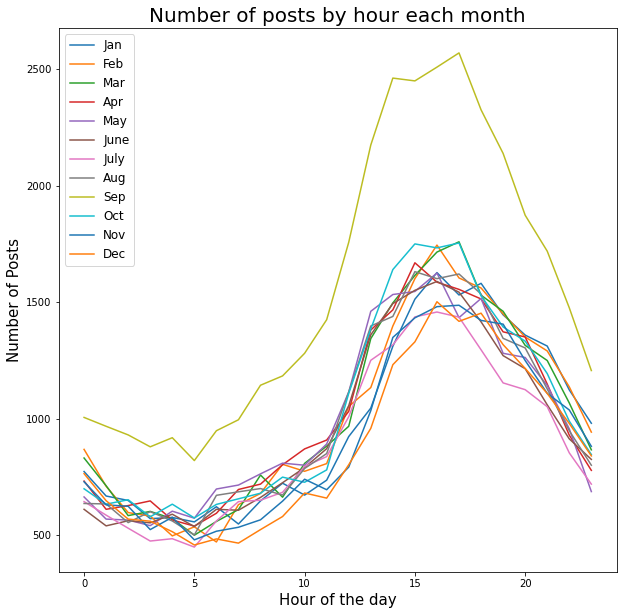

In [22]:
#Posts' hourly distribution by month of the year.

plt.figure()
monthLabel = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
for monthVal in range(1,13):
    hn[hn['month'] == monthVal].groupby(['hour'])['id'].count().plot(figsize=(10,10),label=monthLabel[monthVal-1])

plt.title('Number of posts by hour each month', fontsize=20)   
plt.xlabel("Hour of the day", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.legend(fontsize=12)
plt.show() 

## Let's see if the average comments and upvotes vary by hour.
The peak number of comments, upvotes, and also posts forms a farily consistent distribution over the course of the hours of the day. Therefore, we suspect that the **average number** of comments and upvotes per post stays fairly consistent across the hours of the day. If correct, this would indiacte there is no advantage to be gained from posting during certain hours in an effort to garner more attention to the posts in the form of upvotes and comments.

### 🠋 Average number of comments does not vary much by hour.
### <span style='color:gray '> Mean comments by hour of the day. </span>
This data indicate that the time of day does not generally effect the mean number of comments a post receives, and that the total number of comments is just correlated to the total number of posts per hour.

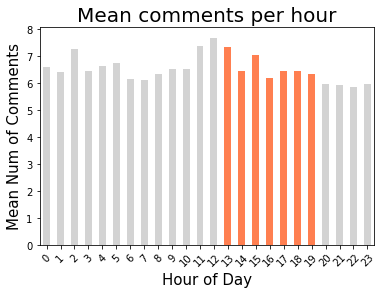

In [23]:
# Mean comments per hour
mean_com_by_hour = hn.groupby('hour').mean()
mean_com_by_hour['num_comments'].plot.bar(color=[
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','coral','coral','coral','coral','coral',
                                                  'coral','coral','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey'
                                                  ])
plt.title('Mean comments per hour', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Mean Num of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Testing for normalcy with large datasets not advised as they almost always fail.
Confirmed this below.

In [24]:
from scipy.stats import norm
from scipy.stats import shapiro

com_by_hour = hn.groupby('hour')

test_comm_normalcy = (com_by_hour['num_comments']
         .apply(lambda x: pd.Series(shapiro(x), index=['W','P']))
         .reset_index())
print(test_comm_normalcy)

    hour level_1  num_comments
0      0       W      0.242513
1      0       P      0.000000
2      1       W      0.245039
3      1       P      0.000000
4      2       W      0.236391
5      2       P      0.000000
6      3       W      0.127967
7      3       P      0.000000
8      4       W      0.246085
9      4       P      0.000000
10     5       W      0.240387
11     5       P      0.000000
12     6       W      0.247416
13     6       P      0.000000
14     7       W      0.225989
15     7       P      0.000000
16     8       W      0.192617
17     8       P      0.000000
18     9       W      0.237715
19     9       P      0.000000
20    10       W      0.238854
21    10       P      0.000000
22    11       W      0.240209
23    11       P      0.000000
24    12       W      0.250708
25    12       P      0.000000
26    13       W      0.243082
27    13       P      0.000000
28    14       W      0.219461
29    14       P      0.000000
30    15       W      0.185809
31    15

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 🠋 Strong positve skew of comment data, indicating it's far from a normal distribution.
Skewness of large datasets is one of the better tests to show how close or far a dataset is from a normal distribution.
Above 1 is strong positive skew, below -1 is strong negative skew.

In [25]:
skew = com_by_hour['num_comments'].skew()
print(skew)

hour
0      8.500600
1      8.726976
2      9.246046
3     38.844064
4      9.006332
5      8.091824
6      8.473305
7      8.344879
8     12.242027
9      8.304487
10     8.174428
11     8.120097
12     8.017052
13     8.476621
14     8.264863
15    12.232330
16    12.605385
17     9.866394
18    16.214306
19    10.013205
20     9.176606
21     8.945869
22     9.929669
23     7.993408
Name: num_comments, dtype: float64


# Need to use non-parametric test to test for differential signficance between hours... need to figure out how to use  Kruskal–Wallis test on groupby data 

###  🠋 Average number of upvotes does not vary much by hour.
### <span style='color:gray '> Mean upvotes by hour of the day. </span>
This data indicate that the time of day does not generally effect the mean number of upvotes ('points') a post receives, and that the total number of upvotes is just correlated to the total number of posts per hour.

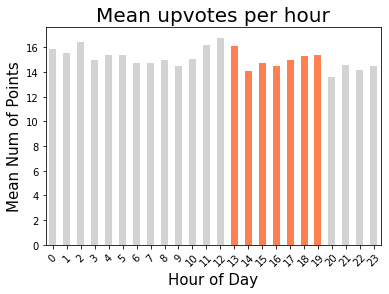

In [26]:
# Mean upvotes per hour
mean_points_by_hour = hn.groupby('hour').mean()
mean_points_by_hour['num_points'].plot.bar(color=[
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey','coral','coral','coral','coral','coral',
                                                  'coral','coral','lightgrey','lightgrey','lightgrey',
                                                  'lightgrey'
                                                  ])

plt.title('Mean upvotes per hour', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Mean Num of Points', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠉 We have verified that there is no advantage in posting during a particular hour of day.

##  Now we will explore metrics of popularity across authors.

### 🠋 Average number of upvotes, top 20 authors.

In [27]:
mean_votes_author=hn.groupby('author').mean()
mean_votes_author['num_points'].sort_values(ascending=False).head(20)

author
intull             2011.0
alankay1           1401.0
mmebane            1248.0
boren_ave11        1213.0
hannahmitt         1172.0
joshmoz            1131.0
legomaster         1126.0
mhurwi             1093.0
ahmad19526         1063.5
dropalltables      1055.0
8bitben            1037.0
zolder             1030.0
oliversisson        958.0
davidtgoldblatt     950.0
orph                929.0
gbrayut             862.0
shancarter          855.0
arechsteiner        847.0
fuzionmonkey        789.5
egb                 784.0
Name: num_points, dtype: float64

### 🠋 Descriptive stats of upvotes for authors.

In [28]:
mean_votes_author['num_points'].describe()

count    51900.000000
mean        13.804493
std         45.006219
min          1.000000
25%          1.666667
50%          3.000000
75%          7.500000
max       2011.000000
Name: num_points, dtype: float64

### 🠋 Creating dataframe containing total number of posts, average number of comments and upvotes per author.

In [29]:
author_total_posts = hn.pivot_table(columns=['author'], aggfunc='size').sort_values(ascending=False)
author_num_posts = author_total_posts.reset_index()
author_num_posts.columns = ['author', 'total_num_posts']

author_posts_avg_comm_pts = pd.merge(mean_votes_author, author_num_posts, on='author', how='left')

author_posts_avg_comm_pts.sort_values(by='total_num_posts', ascending=False).head()

,author,id,num_points,num_comments,hour,month,year,total_num_posts
26432,jonbaer,11582851.0,9.577810,3.394727,12.144636,5.695350,2015.887587,2731
23899,ingve,11273895.0,27.931242,11.234419,14.546039,6.195818,2015.710092,2487
38618,prostoalex,11360725.0,19.631643,13.026570,11.403986,6.429348,2015.730072,1656
16674,dnetesn,11340361.0,12.691496,5.702044,14.146341,6.545814,2015.708635,1517
26942,jseliger,11564898.0,12.836469,10.065847,13.580318,6.273517,2015.829957,1382


### 🠋 Large variance in the distribution of the average number of comments across authors.

<AxesSubplot:>

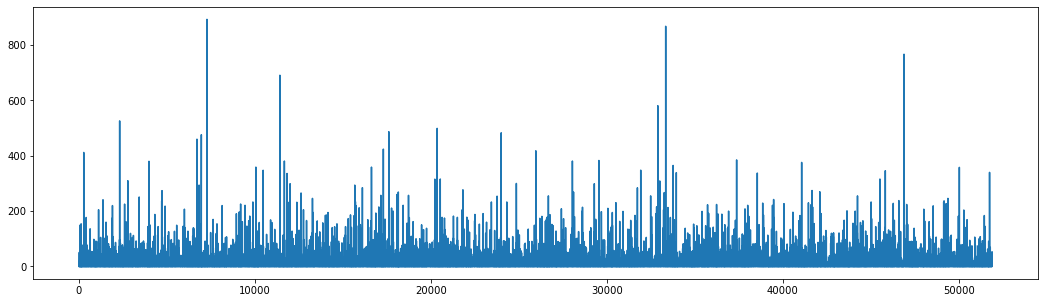

In [30]:
author_posts_avg_comm_pts['num_comments'].plot(figsize=(18,5))

### 🠋  Large variance in the distribution of the average number of upvotes across all authors.

<AxesSubplot:>

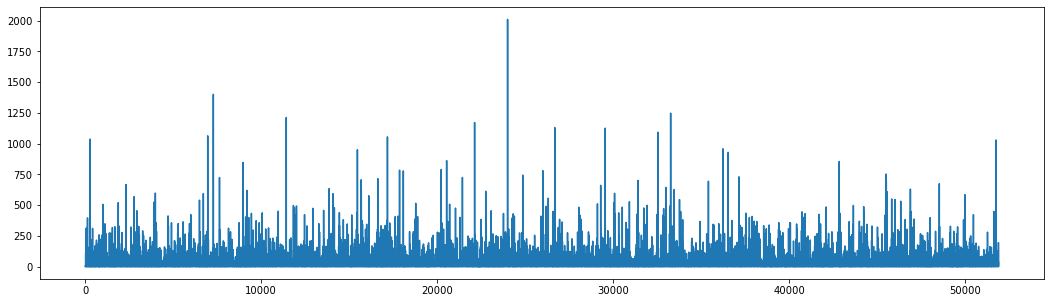

In [31]:
author_posts_avg_comm_pts['num_points'].plot(figsize=(18,5))

### 🠋 Few authors receive a high number of upvotes. 

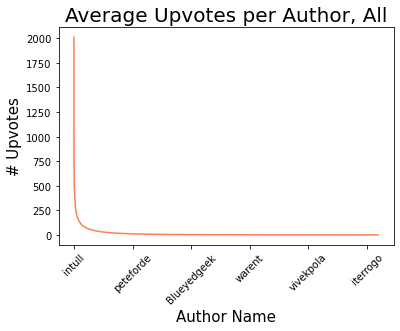

In [32]:
mean_votes_author['num_points'].sort_values(ascending=False).plot.line(color='coral')

plt.title('Average Upvotes per Author, All', fontsize=20)
plt.xlabel('Author Name', fontsize=15)
plt.ylabel('# Upvotes', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Few authors receive high number of upvotes (top 1400 authors).
Also descriptive stats for top 1400 authors.

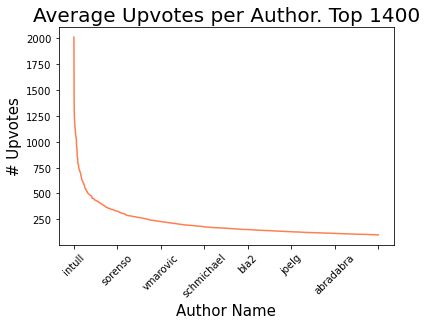

count    1400.000000
mean      216.152877
std       159.090635
min        99.750000
25%       124.550000
50%       163.250000
75%       243.250000
max      2011.000000
Name: num_points, dtype: float64

In [33]:
mean_votes_author['num_points'].sort_values(ascending=False).head(1400).plot.line(color='coral')

plt.title('Average Upvotes per Author. Top 1400', fontsize=20)
plt.xlabel('Author Name', fontsize=15)
plt.ylabel('# Upvotes', fontsize=15)
plt.xticks(rotation=45)
plt.show()

mean_votes_author['num_points'].sort_values(ascending=False).head(1400).describe()

In [34]:
print("Less than", round((1400 / 51900)*100, 2), "% of all authors recieve 100 or more upvotes.")

Less than 2.7 % of all authors recieve 100 or more upvotes.


### 🠉 Few authors have a high number comments and upvotes.
Less than 3% of authors receive 100 or more upvotes.


### 🠋 Average number of comments per post by top 20 authors.

In [35]:
mean_votes_author['num_comments'].sort_values(ascending=False).head(20)

author
alankay1           893.0
mod50ack           868.0
throw94            767.0
boren_ave11        691.0
milfseriously      581.0
Harj               526.0
gallerytungsten    499.0
easyd              487.0
intull             483.0
ahmad19526         476.0
adrow              460.0
dsymonds           424.0
jmcohen            418.0
8bitben            412.0
pekko              385.0
legomaster         383.0
keso               381.0
brentm             381.0
OhHeyItsE          380.0
rschroed           376.0
Name: num_comments, dtype: float64

### 🠋 Descriptive stats of mean number of comments across all authors.

In [36]:
mean_votes_author['num_comments'].describe()

count    51900.000000
mean         5.807115
std         22.040124
min          0.000000
25%          0.000000
50%          0.166667
75%          2.500000
max        893.000000
Name: num_comments, dtype: float64

### 🠋 Only a small portion of authors have a high average number of comments associated with their posts.

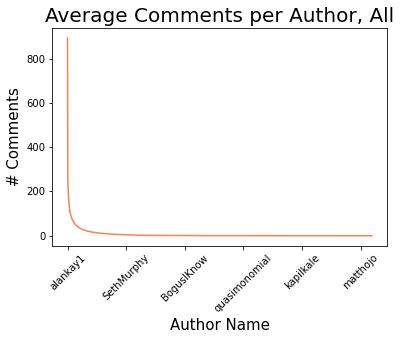

In [37]:
mean_votes_author['num_comments'].sort_values(ascending=False).plot.line(color='coral')

plt.title('Average Comments per Author, All', fontsize=20)
plt.xlabel('Author Name', fontsize=15)
plt.ylabel('# Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Of the top 3% of authors, only a small portion have a high average number of comments associated with their posts. Descriptive stats for top 3% authors.

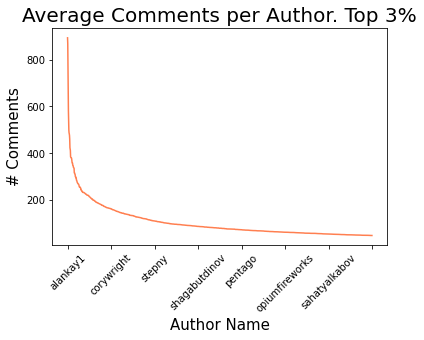

count    1400.000000
mean      105.743585
std        77.007789
min        49.000000
25%        61.000000
50%        80.000000
75%       121.000000
max       893.000000
Name: num_comments, dtype: float64

In [38]:
mean_votes_author['num_comments'].sort_values(ascending=False).head(1400).plot.line(color='coral')

plt.title('Average Comments per Author. Top 3%', fontsize=20)
plt.xlabel('Author Name', fontsize=15)
plt.ylabel('# Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

mean_votes_author['num_comments'].sort_values(ascending=False).head(1400).describe()

In [39]:
print("Less than", round((1400 / 51900)*100, 2), "% of all authors recieve 50 or more comments.")

Less than 2.7 % of all authors recieve 50 or more comments.


### 🠉 Less than 3% of authors receive 50 or more comments.
These data indicate that only a small minorty (<3%) of Hacker News authors have high levels of engagement (>100 upvotes, >50 comments.

## Few authors have high levels of comments and upvotes associated with their posts.
It will be inetresting to see if authors that post the most are the ones with the highest average number of comments and upvotes. So we wil look at this next.

### 🠋 Descriptive stats of authors' total posts, average number of comments and upvotes received.

In [40]:
author_posts_avg_comm_pts.sort_values(by='total_num_posts', ascending=False).describe()

,id,num_points,num_comments,hour,month,year,total_num_posts
count,51900.00,51900.000000,51900.000000,51900.000000,51900.000000,51900.000000,51900.000000
mean,11328552.00,13.804493,5.807115,13.482606,6.575082,2015.702131,5.647765
std,627673.75,45.006219,22.040124,5.259072,2.887161,0.399467,31.501540
min,10176951.00,1.000000,0.000000,0.000000,1.000000,2015.000000,1.000000
25%,10842911.50,1.666667,0.000000,10.500000,4.500000,2015.500000,1.000000
50%,11308820.50,3.000000,0.166667,14.000000,6.750000,2016.000000,1.000000
75%,11805202.75,7.500000,2.500000,17.000000,9.000000,2016.000000,3.000000
max,12578975.00,2011.000000,893.000000,23.000000,12.000000,2016.000000,2731.000000


### 🠋 Top 5 authors with most posts.

In [41]:
total_votes_author=hn.groupby('author').sum()

author_posts_total_comm_pts = pd.merge(total_votes_author, author_num_posts, on='author', how='left')

author_posts_total_comm_pts.sort_values(by='total_num_posts', ascending=False).head()

,author,id,num_points,num_comments,hour,month,year,total_num_posts
26432,jonbaer,3.163276e+10,26157.0,9271.0,33167,15554,5505389,2731
23899,ingve,2.803817e+10,69465.0,27940.0,36176,15409,5013071,2487
38618,prostoalex,1.881336e+10,32510.0,21572.0,18885,10647,3338049,1656
16674,dnetesn,1.720333e+10,19253.0,8650.0,21460,9930,3057830,1517
26942,jseliger,1.598269e+10,17740.0,13911.0,18768,8670,2785877,1382


### 🠋 Comments: Trend of authors with high number of posts also have the high number of comments.

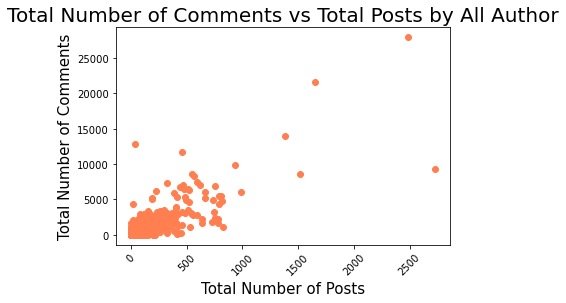

In [42]:
plt.scatter(x=author_posts_total_comm_pts['total_num_posts'], y=author_posts_total_comm_pts['num_comments'], color='coral')

plt.title('Total Number of Comments vs Total Posts by All Author', fontsize=20)
plt.xlabel('Total Number of Posts', fontsize=15)
plt.ylabel('Total Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Upvotes: Trend of authors with high number of posts also have the high number of upvotes.

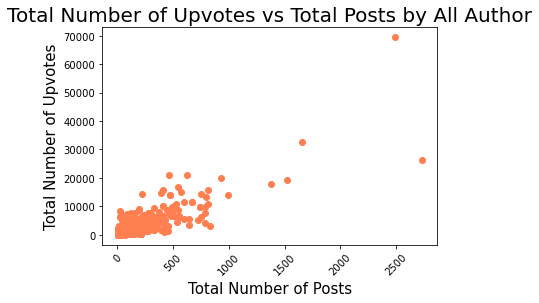

In [43]:
plt.scatter(x=author_posts_total_comm_pts['total_num_posts'], y=author_posts_total_comm_pts['num_points'], color='coral')

plt.title('Total Number of Upvotes vs Total Posts by All Author', fontsize=20)
plt.xlabel('Total Number of Posts', fontsize=15)
plt.ylabel('Total Number of Upvotes', fontsize=15)
plt.xticks(rotation=45)
plt.show()

## There is trend of high numbers of both comments and upvotes in authors with high number of posts.
### We will now perform some linear regression analyses to test these trends for robustness.

### 🠋 The authors with both the highest and lowest average number of comments are authors with very few posts.

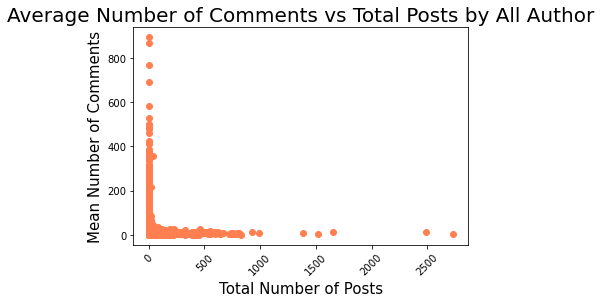

In [44]:
plt.scatter(x=author_posts_avg_comm_pts['total_num_posts'], y=author_posts_avg_comm_pts['num_comments'], color='coral')

plt.title('Average Number of Comments vs Total Posts by All Author', fontsize=20)
plt.xlabel('Total Number of Posts', fontsize=15)
plt.ylabel('Mean Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 The authors with both the highest and lowest average number of upvotes are authors with very few posts.

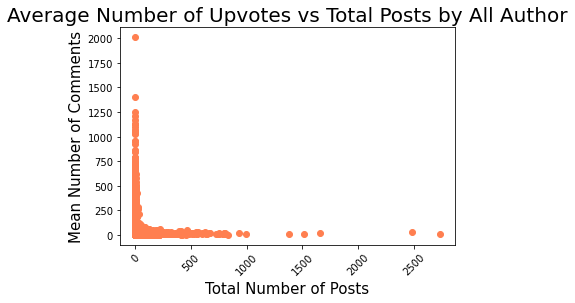

In [45]:
plt.scatter(x=author_posts_avg_comm_pts['total_num_posts'], y=author_posts_avg_comm_pts['num_points'], color='coral')

plt.title('Average Number of Upvotes vs Total Posts by All Author', fontsize=20)
plt.xlabel('Total Number of Posts', fontsize=15)
plt.ylabel('Mean Number of Comments', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### 🠋 Parsing authors with 3 or more posts.

In [46]:
author_posts_total_comm_pts.sort_values(by=['total_num_posts'], ascending=False, inplace=True)

author_posts_total_comm_pts_3posts = author_posts_total_comm_pts.drop(author_posts_total_comm_pts.index[range(16918,51900)], axis=0)
author_posts_total_comm_pts_3posts.tail(5)


,author,id,num_points,num_comments,hour,month,year,total_num_posts
35715,notgood,33177080.0,139.0,77.0,24,29,6046,3
32156,mdsteph,34855200.0,16.0,4.0,37,25,6047,3
1259,Colex,33763156.0,11.0,0.0,16,32,6046,3
8487,ankneo,34457540.0,8.0,0.0,51,24,6047,3
199,4thethrillofit,32529048.0,4.0,0.0,44,25,6046,3


### 🠋 Linear regression plot shows positive correlation between total number of upvotes vs total number of posts by each author.

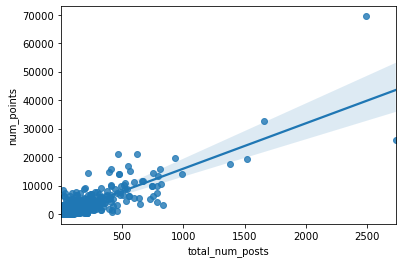

In [47]:
import seaborn as sns

sns.regplot(x="total_num_posts", y="num_points", data=author_posts_total_comm_pts);

### 🠋 Linear regression plot shows positive correlation between total number of upvotes vs total number of posts by authors with at least 3 posts.
Trend in the positive correlation does not change when looking at only authors with 3 or more posts.

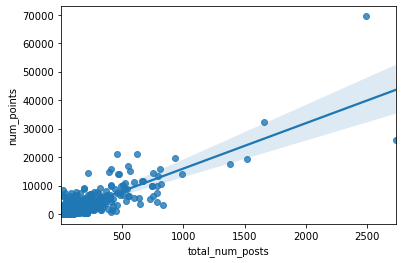

In [48]:
sns.regplot(x="total_num_posts", y="num_points", data=author_posts_total_comm_pts_3posts);


### 🠋 Linear regression plot shows positive correlation between total number of comments vs total number of posts by each author.

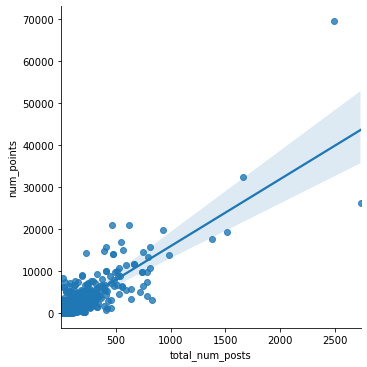

In [49]:
sns.lmplot(x="total_num_posts", y="num_points", data=author_posts_total_comm_pts);

### 🠋 Boxplot of the total number of upvotes, comments, and posts by all authors.

num_points            AxesSubplot(0.125,0.125;0.227941x0.755)
num_comments       AxesSubplot(0.398529,0.125;0.227941x0.755)
total_num_posts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

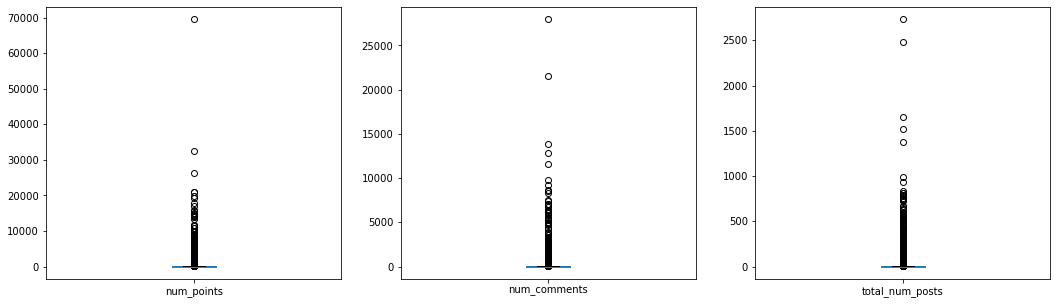

In [50]:
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

hn_posts_points_comms_total = author_posts_total_comm_pts.drop(columns=['author', 'id', 'year', 'hour', 'month'], axis=1)

hn_posts_points_comms_total.plot(kind='box', figsize=(18,5), subplots=True)

### 🠋 Boxplot after removing outliers (>2 std dev) of the total number of upvotes, comments, and posts by all authors.

num_points            AxesSubplot(0.125,0.125;0.227941x0.755)
num_comments       AxesSubplot(0.398529,0.125;0.227941x0.755)
total_num_posts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

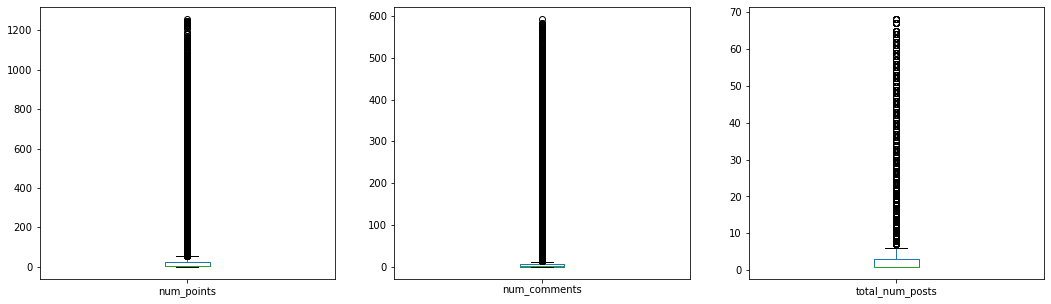

In [51]:
std_dev = 2

hn_posts_points_comms_total_removed_outliers = hn_posts_points_comms_total[(np.abs(stats.zscore(hn_posts_points_comms_total)) < float(std_dev)).all(axis=1)]

hn_posts_points_comms_total_removed_outliers.plot(kind='box', figsize=(18,5), subplots=True)

### 🠋 Linear regression shows no correlation between the total number of upvotes vs total number of posts, after removing outliers (>2 std dev).

In [52]:
X = pd.DataFrame(hn_posts_points_comms_total_removed_outliers['total_num_posts'])
y = pd.DataFrame(hn_posts_points_comms_total_removed_outliers['num_comments'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)

print(scores)

[0.24693257010738545, 0.2557338421283133, 0.24589650175835343]


### 🠋 Violin plots of the distribution of total upvotes, comments, and posts by all authors.

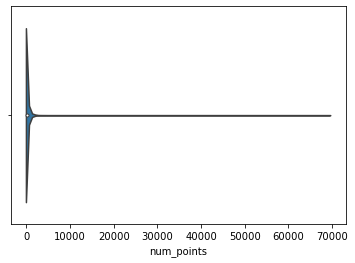

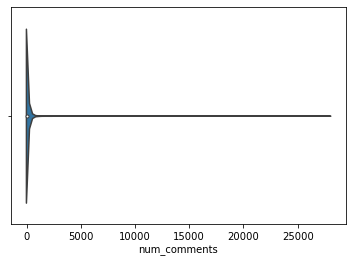

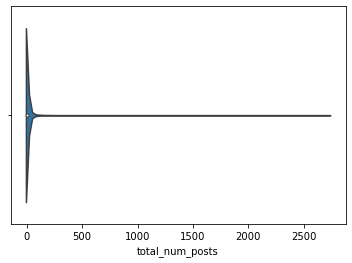

In [53]:
points_total = hn_posts_points_comms_total.num_points
comments_total = hn_posts_points_comms_total.num_comments
posts_total = hn_posts_points_comms_total.total_num_posts

sns.violinplot(x=points_total)
plt.show()
sns.violinplot(x=comments_total)
plt.show()
sns.violinplot(x=posts_total)
plt.show()

### 🠋 Violin plots of the distribution of total upvotes, comments, and posts by all authors, after removing outliers (>2 std dev).

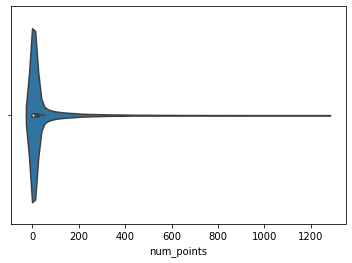

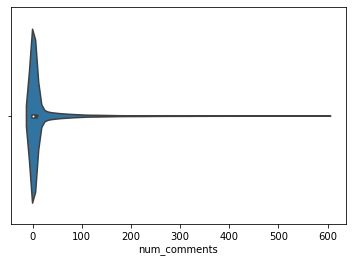

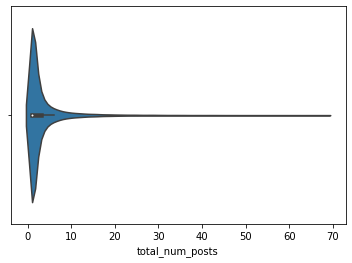

In [54]:
points_total_no_outliers = hn_posts_points_comms_total_removed_outliers.num_points
comments_total_no_outliers = hn_posts_points_comms_total_removed_outliers.num_comments
posts_total_no_outliers = hn_posts_points_comms_total_removed_outliers.total_num_posts

sns.violinplot(x=points_total_no_outliers)
plt.show()
sns.violinplot(x=comments_total_no_outliers)
plt.show()
sns.violinplot(x=posts_total_no_outliers)
plt.show()

### 🠋 Violin plots of natural-log-transformed distribution of total upvotes, comments, and posts by all authors, after removing outliers (>2 std dev).

<ipython-input-55-90a7f4b0abd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_posts_points_comms_total_removed_outliers['log_points'] = hn_posts_points_comms_total_removed_outliers['num_points']
<ipython-input-55-90a7f4b0abd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_posts_points_comms_total_removed_outliers['log_points'] = np.log(hn_posts_points_comms_total_removed_outliers['log_points'])
<ipython-input-55-90a7f4b0abd4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

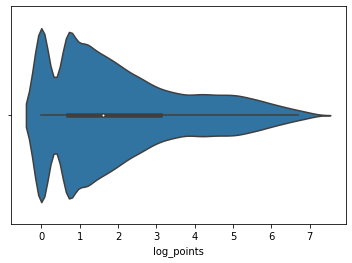

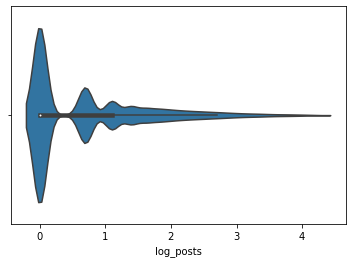

In [55]:
hn_posts_points_comms_total_removed_outliers['log_points'] = hn_posts_points_comms_total_removed_outliers['num_points']

hn_posts_points_comms_total_removed_outliers['log_points'] = np.log(hn_posts_points_comms_total_removed_outliers['log_points'])




# hn_posts_points_comms_total_removed_outliers['log_comms'] = np.log(hn_posts_points_comms_total_removed_outliers['num_comments'])
hn_posts_points_comms_total_removed_outliers['log_posts'] = np.log(hn_posts_points_comms_total_removed_outliers['total_num_posts'])

points_total_no_outliers_log = hn_posts_points_comms_total_removed_outliers.log_points
# comms_total_no_outliers_log = hn_posts_points_comms_total_removed_outliers.log_comms
posts_total_no_outliers_log = hn_posts_points_comms_total_removed_outliers.log_posts

sns.violinplot(x=points_total_no_outliers_log)
plt.show()
# sns.violinplot(x=comms_total_no_outliers_log)
# plt.show()
sns.violinplot(x=posts_total_no_outliers_log)
plt.show()

### 🠋 Boxplot of the total number of upvotes, comments, and posts by all authors that have at least 3 posts.

num_points            AxesSubplot(0.125,0.125;0.227941x0.755)
num_comments       AxesSubplot(0.398529,0.125;0.227941x0.755)
total_num_posts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

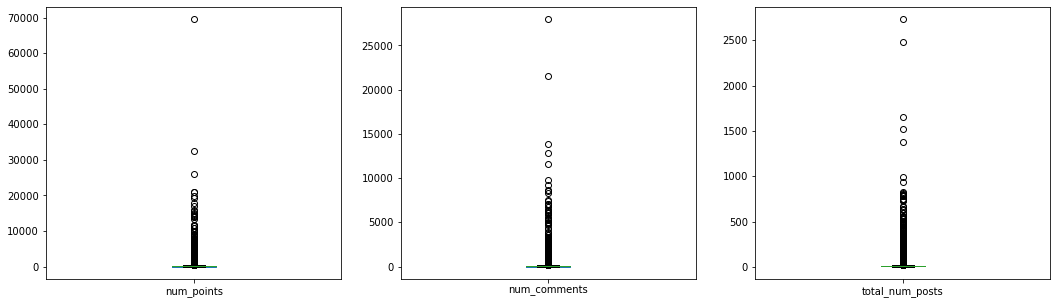

In [56]:
hn_post_points_comms_3posts = author_posts_total_comm_pts_3posts.drop(columns=['author', 'id', 'year', 'hour', 'month'], axis=1)

hn_post_points_comms_3posts.plot(kind='box', figsize=(18,5), subplots=True)

### 🠋 Table of total upvotes, comments, and posts (sorted by number of posts).

In [57]:
hn_posts_points_comms_total

,num_points,num_comments,total_num_posts
26432,26157.0,9271.0,2731
23899,69465.0,27940.0,2487
38618,32510.0,21572.0,1656
16674,19253.0,8650.0,1517
26942,17740.0,13911.0,1382
...,...,...,...
32498,2.0,0.0,1
32497,2.0,1.0,1
13835,3.0,0.0,1
32495,2.0,0.0,1


### 🠋 Violin plots of natural-log-transformed distribution of total upvotes, comments, and posts by all authors with 3 or more posts.

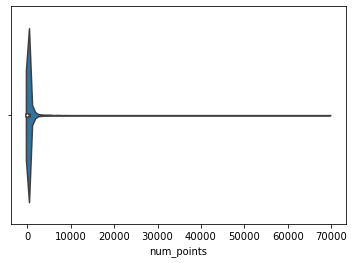

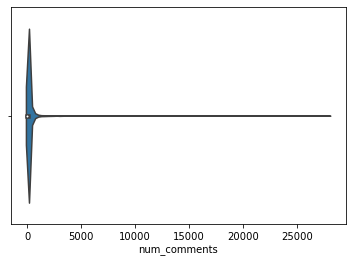

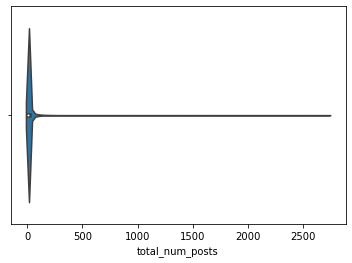

In [58]:
points = hn_post_points_comms_3posts.num_points
comments = hn_post_points_comms_3posts.num_comments
posts = hn_post_points_comms_3posts.total_num_posts

sns.violinplot(x=points)
plt.show()
sns.violinplot(x=comments)
plt.show()
sns.violinplot(x=posts)
plt.show()

### 🠋 Violin plots of natural log transformed distribution of total upvotes, comments, and posts by all authors with 3 or more posts, after removing outliers (>2 std dev).

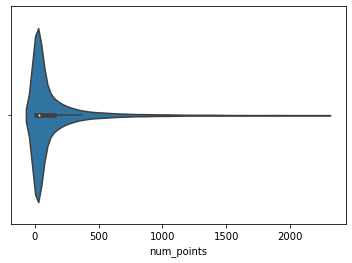

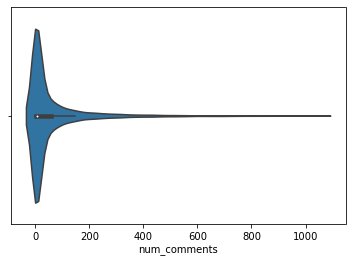

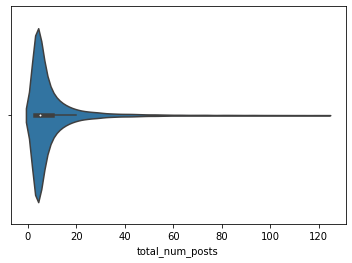

In [59]:
std_dev = 2

hn_post_pts_comm_only_removed_outliers = hn_post_points_comms_3posts[(np.abs(stats.zscore(hn_post_points_comms_3posts)) < float(std_dev)).all(axis=1)]
                                                                             
points_no_outliers = hn_post_pts_comm_only_removed_outliers.num_points
comments_no_outliers = hn_post_pts_comm_only_removed_outliers.num_comments
posts_no_outliers = hn_post_pts_comm_only_removed_outliers.total_num_posts

sns.violinplot(x=points_no_outliers)
plt.show()
sns.violinplot(x=comments_no_outliers)
plt.show()
sns.violinplot(x=posts_no_outliers)
plt.show()

### 🠋 Box plots of natural log transformed distribution of total upvotes, comments, and posts by all authors with 3 or more posts.

<AxesSubplot:>

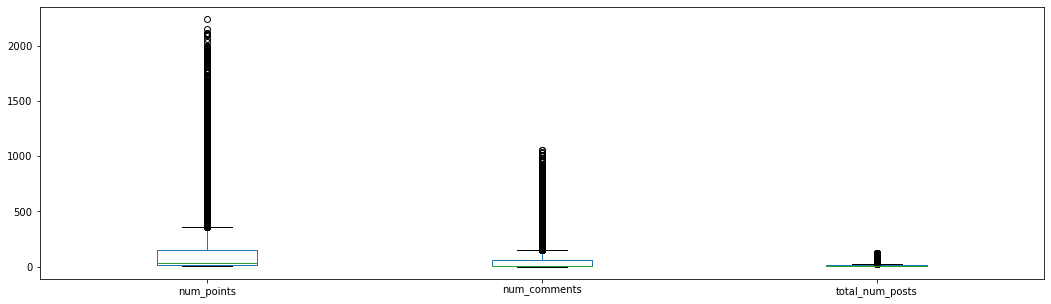

In [60]:
hn_post_metrics_num_only = author_posts_total_comm_pts_3posts.drop(columns=['author', 'id', 'year', 'hour', 'month'], axis=1)

hn_post_metrics_num_only.head()

std_dev = 2

hn_post_metrics_num_only_removed_outliers = hn_post_metrics_num_only[(np.abs(stats.zscore(hn_post_metrics_num_only)) < float(std_dev)).all(axis=1)]

hn_post_metrics_num_only_removed_outliers.plot(kind='box', figsize=(18,5))

### 🠋 Linear regression analysis of total upvotes vs total posts by all authors with at least 3 posts.

In [61]:
X = pd.DataFrame(author_posts_total_comm_pts_3posts['total_num_posts'])
y = pd.DataFrame(author_posts_total_comm_pts_3posts['num_points'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)

print(scores)

[0.6281311898417847, 0.6625627362087836, 0.7471630890171248]
